# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#  Importing Dataset

In [2]:
# Define path
path = r'C:\Users\Administrator\Desktop\DataImmersion'

In [3]:
## Importing  latest merged dataset
df_final_data = pd.read_pickle(os.path.join(path, 'chapter4', 'Prepared data', 'Final_data_Task9_Part1.pkl'))

In [4]:
df_final_data.shape

(32404859, 35)

In [5]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Surname,Gender,State,Age,date_joined,no_of_dependants,family_status,income,STATE,_merge
0,1,Chocolate Sandwich Cookies,61,19,5,3139998,138,28,6,11,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
1,1,Chocolate Sandwich Cookies,61,19,5,1977647,138,30,6,17,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
2,907,Premium Sliced Bacon,106,12,20,3160996,138,1,5,13,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
3,907,Premium Sliced Bacon,106,12,20,2254091,138,10,5,14,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both
4,1000,Apricots,18,10,12,505689,138,9,6,12,...,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Minnesota,both


 # Security Implication

In [6]:
df_final_data.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spender_flag', 'order_frequency', 'frequency_flag',
       'First_name', 'Surname', 'Gender', 'State', 'Age', 'date_joined',
       'no_of_dependants', 'family_status', 'income', 'STATE', '_merge'],
      dtype='object')

I think 'First_name'and 'Surname'columns contain personally identifiable information (PII).  If these columns are not necessary for analysis, they can be removed after discussing with client or seniors.

# Customer behavior in different Geographic areas

In [7]:
df_final_data['STATE'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [8]:
#Assigning regions to new varisble
result = []
for value in df_final_data['STATE']:
    if value in('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
        result.append('Northeast')
    elif value in('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
        result.append('Mideast')
    elif value in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        result.append('South')
    elif value in('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        result.append('West')
    else:
        result.append("Not Enough Data")

In [9]:
# Creating 'Region' column in df_final_data using result data
df_final_data['Region'] = result

In [10]:
# Checking the count for this new column
df_final_data['Region'].value_counts(dropna= False)

South        10791885
West          8292913
Mideast       7597325
Northeast     5722736
Name: Region, dtype: int64

In [11]:
# check the difference in spending habits between the different U.S. regions,  we can create crosstab between Region and Spender_Flag
crosstab = pd.crosstab(df_final_data['Region'], df_final_data['spender_flag'], dropna = False)

In [12]:
crosstab

spender_flag,High spender,Low spender
Region,,
Mideast,155975,7441350
Northeast,108200,5614536
South,209610,10582275
West,160328,8132585


Customers from the South region has the largest number of both high & low spenders followed by the West, Midwest & then finally the Northeast.

In [13]:
 # Spending habit based on total amount spent 
df_final_data.groupby(['Region']).agg({'prices':['sum']})

,prices
,sum
Region,
Mideast,93247038
Northeast,63598842
South,126845462
West,90209587


The total amount spendfor puchasing is more in South region followed by Mideast,West, Northeast

# Creating an exclusion flag for low-activity customers

In [14]:
# Creating new column Activity_Flag for low_activity_customers

df_final_data.loc[df_final_data['order_number'] < 5,'Activity_Flag'] = 'Low_Activity_Customer'

In [15]:
# Creating new column Activity_Flag for high_activity_customers

df_final_data.loc[df_final_data['order_number'] >= 5,'Activity_Flag'] = 'High_Activity_Customer'

In [16]:
df_final_data['Activity_Flag'].value_counts(dropna = False)

High_Activity_Customer    24414877
Low_Activity_Customer      7989982
Name: Activity_Flag, dtype: int64

In [17]:
# Creating subset for low activity customers
df_low_activity = df_final_data[df_final_data.Activity_Flag == 'Low_Activity_Customer']

In [18]:
df_low_activity.shape

(7989982, 37)

In [19]:
#Export df_low_activity data to pkl
df_low_activity.to_pickle(os.path.join(path,'chapter4','Prepared data', 'df_low_activity_task_10.pkl'))

In [20]:
#Updating final data with only high activity customers
df_final_data =  df_final_data[df_final_data.Activity_Flag == 'High_Activity_Customer']

In [21]:
df_final_data.shape

(24414877, 37)

# Customer Profiling

## Creating Age profiling 

In [22]:
df_final_data['Age'].value_counts(dropna=False)


48    403566
49    403148
79    402285
31    401576
64    400538
       ...  
28    363922
60    361739
66    356236
25    352977
41    352967
Name: Age, Length: 64, dtype: int64

In [23]:
df_final_data['Age'].min()

18

In [24]:

# Condition for young customers
df_final_data.loc[((df_final_data['Age'] >= 18) & (df_final_data['Age'] < 35)) , 'Generation_flag'] = 'Young customers'


In [25]:
# Condition for Middle-Age customers
df_final_data.loc[((df_final_data['Age'] >= 35) & (df_final_data['Age'] < 60 )), 'Generation_flag'] = 'Mid-Age Customers'


In [26]:
# Condition for Old-Age customers
df_final_data.loc[((df_final_data['Age'] >= 60)), 'Generation_flag'] = 'Old-Age customers'


In [27]:
# Checking the count of Generation_flag column
df_final_data['Generation_flag'].value_counts(dropna = False)

Mid-Age Customers    9583838
Old-Age customers    8330598
Young customers      6500441
Name: Generation_flag, dtype: int64

## Creating Income profiling

In [28]:
df_final_data['income'].value_counts(dropna=False)

72344     4084
57501     3931
112610    3917
115620    3633
36163     3529
          ... 
67647        1
151821       1
83910        1
78618        1
132528       1
Name: income, Length: 96069, dtype: int64

In [29]:
df_final_data['income'].describe()

count    2.441488e+07
mean     9.989505e+04
std      4.333357e+04
min      2.590300e+04
25%      6.752400e+04
50%      9.683600e+04
75%      1.281600e+05
max      5.939010e+05
Name: income, dtype: float64

In [30]:
# Creating Income_Level column for low level income profiles
df_final_data.loc[(df_final_data['income'] < 43000), 'Income_flag'] = 'Lower Income'


In [31]:
# Creating Income_Level column for Middle level income profiles
df_final_data.loc[(df_final_data['income'] >= 43000) & (df_final_data['income'] < 128000), 'Income_flag'] = 'Middle Income'


In [32]:
# Creating Income_Level column for High level income profiles
df_final_data.loc[(df_final_data['income'] >= 128000), 'Income_flag'] = 'Higher Income'


In [33]:
# Checking the count of Income Level column
df_final_data['Income_flag'].value_counts(dropna = False)

Middle Income    16672461
Higher Income     6124002
Lower Income      1618414
Name: Income_flag, dtype: int64

## Creating order_hour_of_day Profiling


In [34]:

df_final_data['order_hour_of_day'].value_counts(dropna=False)

10    2119103
11    2070794
14    2018254
13    1997116
15    1988057
12    1961666
9     1909015
16    1880003
17    1533831
8     1349840
18    1192690
19     919242
20     724980
7      704807
21     601378
22     477020
23     300281
6      227981
0      160533
1       83352
5       67956
2       50025
4       39660
3       37293
Name: order_hour_of_day, dtype: int64

In [35]:
df_final_data['order_hour_of_day'].describe()

count    2.441488e+07
mean     1.336244e+01
std      4.247337e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [36]:
# Creating Time flag column 
df_final_data.loc[((df_final_data['order_hour_of_day'] >= 4) &(df_final_data['order_hour_of_day'] <= 8 ) ), 'Time_flag'] = 'Early Morning Orders'


In [37]:
df_final_data.loc[((df_final_data['order_hour_of_day'] >8) &(df_final_data['order_hour_of_day'] <= 12 ) ), 'Time_flag'] = ' Morning Orders'

In [38]:
df_final_data.loc[((df_final_data['order_hour_of_day'] > 12) &(df_final_data['order_hour_of_day'] <= 16 ) ), 'Time_flag'] = ' After noon Orders'

In [39]:
df_final_data.loc[((df_final_data['order_hour_of_day'] >16) &(df_final_data['order_hour_of_day'] <=23 ) ), 'Time_flag'] = 'Evening Orders'

In [40]:
df_final_data.loc[((df_final_data['order_hour_of_day'] >=0) & (df_final_data['order_hour_of_day'] <= 3 ) ), 'Time_flag'] = 'Late night Orders'

In [41]:
df_final_data['Time_flag'].value_counts(dropna = False)

 Morning Orders         8060578
 After noon Orders      7883430
Evening Orders          5749422
Early Morning Orders    2390244
Late night Orders        331203
Name: Time_flag, dtype: int64

In [42]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,no_of_dependants,family_status,income,STATE,_merge,Region,Activity_Flag,Generation_flag,Income_flag,Time_flag
0,1,Chocolate Sandwich Cookies,61,19,5,3139998,138,28,6,11,...,1,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders
1,1,Chocolate Sandwich Cookies,61,19,5,1977647,138,30,6,17,...,1,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Evening Orders
3,907,Premium Sliced Bacon,106,12,20,2254091,138,10,5,14,...,1,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders
4,1000,Apricots,18,10,12,505689,138,9,6,12,...,1,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders
5,3265,Mini Seedless Watermelon Pack,32,4,1,960220,138,17,5,14,...,1,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders


## Creating  Alcohol Consumption Profiling


In [43]:

df_final_data['department_id'].value_counts(dropna=False)

4     7227091
16    4120488
19    2187121
7     2036447
1     1627614
13    1385375
3      883330
15     787790
20     783011
9      633725
17     539349
14     524945
12     523890
18     335947
11     328480
6      197900
5      107972
8       72111
21      57567
10      27558
2       27166
Name: department_id, dtype: int64

In [44]:
df_dep = pd.read_csv(os.path.join(path, 'chapter4', 'Prepared data', 'departments_wrangled.csv'))

In [45]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [46]:
# First create alcohol order flag column with department_id 5 
df_final_data.loc[(df_final_data['department_id'] == 5), 'Alcohol Order'] = 1

In [47]:
# Condition for no alcohol order
df_final_data.loc[(df_final_data['department_id'] != 5), 'Alcohol Order'] = 0


In [48]:
# Count of Alcohol Order flag
df_final_data['Alcohol Order'].value_counts(dropna = False)

0.0    24306905
1.0      107972
Name: Alcohol Order, dtype: int64

In [49]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,family_status,income,STATE,_merge,Region,Activity_Flag,Generation_flag,Income_flag,Time_flag,Alcohol Order
0,1,Chocolate Sandwich Cookies,61,19,5,3139998,138,28,6,11,...,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders,0.0
1,1,Chocolate Sandwich Cookies,61,19,5,1977647,138,30,6,17,...,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Evening Orders,0.0
3,907,Premium Sliced Bacon,106,12,20,2254091,138,10,5,14,...,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders,0.0
4,1000,Apricots,18,10,12,505689,138,9,6,12,...,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders,0.0
5,3265,Mini Seedless Watermelon Pack,32,4,1,960220,138,17,5,14,...,married,49620,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders,0.0


## Creating Parent status column


In [50]:
# Condition for no dependents
df_final_data.loc[(df_final_data ['no_of_dependants'] == 0), 'Parent_Status'] = 'No Dependants/Not Parents'

In [51]:
# Condition for young parents
df_final_data.loc[((df_final_data['Age'] >= 18) & (df_final_data['Age'] < 35) & (df_final_data['no_of_dependants'] >= 1)), 'Parent_Status'] = 'Young Parents'


In [52]:
# Condition for Middle-Age parents
df_final_data.loc[((df_final_data['Age'] >= 35) & (df_final_data['Age'] < 60) & (df_final_data['no_of_dependants'] >= 1)), 'Parent_Status'] = 'Mid-Age Parents'


In [53]:
# Condition for Old-Age parents
df_final_data.loc[((df_final_data['Age'] >= 60) & (df_final_data['no_of_dependants'] >= 1)), 'Parent_Status'] = 'Old-Age Parents'


In [54]:
# Checking the count of Parent_Status column
df_final_data['Parent_Status'].value_counts(dropna = False)

Mid-Age Parents              7190133
Old-Age Parents              6241386
No Dependants/Not Parents    6105002
Young Parents                4878356
Name: Parent_Status, dtype: int64

## Creating Alcohol Drinkers column 

In [55]:
# Grouping by user_id, sum by total num of orders in dept 5 per user_id (Alcohol Order Flag)

df_group_Alcohol = df_final_data.groupby('user_id').agg({'Alcohol Order':'sum'})


In [56]:
# Creating Alcohol Drinker column based on alcohol order flag

df_group_Alcohol.loc[(df_group_Alcohol['Alcohol Order'] >= 1), 'Alcohol Drinker'] = "Alcohol Drinker"
df_group_Alcohol.loc[(df_group_Alcohol['Alcohol Order'] == 0), 'Alcohol Drinker'] = "Not Alcohol Drinker"


In [57]:
# Dropping Alcohol Order Flag column

df_group_Alcohol = df_group_Alcohol.drop(columns = ['Alcohol Order'])


In [58]:
df_group_Alcohol.shape


(162631, 1)

In [59]:

df_group_Alcohol['Alcohol Drinker'].value_counts(dropna = False)

Not Alcohol Drinker    152643
Alcohol Drinker          9988
Name: Alcohol Drinker, dtype: int64

## Merging original data set with alcohol drinkers data set


In [60]:
# Left join df_final_data (left) with df_group_Alcohol (right) to get "Alcohol Drinker" for each user_id
df_final_data = df_final_data.merge(df_group_Alcohol, on='user_id', how='left')


In [61]:
df_final_data.shape

(24414877, 43)

In [62]:
df_final_data['Alcohol Drinker'].value_counts(dropna = False)

Not Alcohol Drinker    22780060
Alcohol Drinker         1634817
Name: Alcohol Drinker, dtype: int64

In [63]:

df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,STATE,_merge,Region,Activity_Flag,Generation_flag,Income_flag,Time_flag,Alcohol Order,Parent_Status,Alcohol Drinker
0,1,Chocolate Sandwich Cookies,61,19,5,3139998,138,28,6,11,...,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders,0.0,Old-Age Parents,Not Alcohol Drinker
1,1,Chocolate Sandwich Cookies,61,19,5,1977647,138,30,6,17,...,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Evening Orders,0.0,Old-Age Parents,Not Alcohol Drinker
2,907,Premium Sliced Bacon,106,12,20,2254091,138,10,5,14,...,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders,0.0,Old-Age Parents,Not Alcohol Drinker
3,1000,Apricots,18,10,12,505689,138,9,6,12,...,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders,0.0,Old-Age Parents,Not Alcohol Drinker
4,3265,Mini Seedless Watermelon Pack,32,4,1,960220,138,17,5,14,...,Minnesota,both,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders,0.0,Old-Age Parents,Not Alcohol Drinker


In [64]:

# First create baby product flag column with department_id 5 
df_final_data.loc[(df_final_data['department_id'] == 18), 'Baby product'] = 1

In [65]:
# Condition for non baby product buyer
df_final_data.loc[(df_final_data['department_id'] != 18), 'Baby product'] = 0


In [66]:
# Count of baby product flag
df_final_data['Baby product'].value_counts(dropna = False)

0.0    24078930
1.0      335947
Name: Baby product, dtype: int64

In [67]:
# Grouping by user_id, sum by total num of orders in dept 18 per user_id 

df_group_baby = df_final_data.groupby('user_id').agg({'Baby product':'sum'})


In [68]:
df_group_baby.loc[(df_group_baby['Baby product'] >= 1), 'Baby product flag'] = "Baby product buyers"
df_group_baby.loc[(df_group_baby['Baby product'] == 0), 'Baby product flag'] = "Non Baby product buyers"


In [69]:
df_group_baby = df_group_baby.drop(columns = ['Baby product'])

In [70]:
df_group_baby['Baby product flag'].value_counts(dropna = False)

Non Baby product buyers    136860
Baby product buyers         25771
Name: Baby product flag, dtype: int64

In [71]:
df_group_baby.shape

(162631, 1)

# Merging original data set with Baby product buyer data set

In [72]:
# Left join df_final_data (left) with df_group_baby (right) to get "Baby product flag" for each user_id
df_final_data = df_final_data.merge(df_group_baby, on='user_id', how='left')


In [73]:
df_final_data.shape

(24414877, 45)

In [74]:
df_final_data.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,Region,Activity_Flag,Generation_flag,Income_flag,Time_flag,Alcohol Order,Parent_Status,Alcohol Drinker,Baby product,Baby product flag
0,1,Chocolate Sandwich Cookies,61,19,5,3139998,138,28,6,11,...,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders,0.0,Old-Age Parents,Not Alcohol Drinker,0.0,Non Baby product buyers
1,1,Chocolate Sandwich Cookies,61,19,5,1977647,138,30,6,17,...,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Evening Orders,0.0,Old-Age Parents,Not Alcohol Drinker,0.0,Non Baby product buyers
2,907,Premium Sliced Bacon,106,12,20,2254091,138,10,5,14,...,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders,0.0,Old-Age Parents,Not Alcohol Drinker,0.0,Non Baby product buyers
3,1000,Apricots,18,10,12,505689,138,9,6,12,...,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,Morning Orders,0.0,Old-Age Parents,Not Alcohol Drinker,0.0,Non Baby product buyers
4,3265,Mini Seedless Watermelon Pack,32,4,1,960220,138,17,5,14,...,Mideast,High_Activity_Customer,Old-Age customers,Middle Income,After noon Orders,0.0,Old-Age Parents,Not Alcohol Drinker,0.0,Non Baby product buyers


In [75]:
df_final_data['Baby product flag'].value_counts(dropna = False)

Non Baby product buyers    16594684
Baby product buyers         7820193
Name: Baby product flag, dtype: int64

## Visualization of Profiles distribution


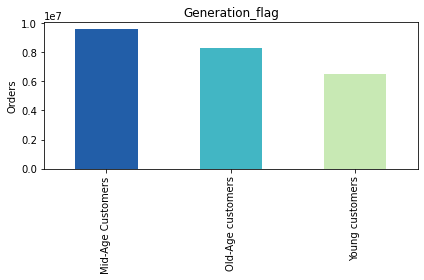

In [179]:
# Creating bar plot for Generation_flag
bar_generation_flag = df_final_data['Generation_flag'].value_counts().plot.bar(color=sns.color_palette('YlGnBu_r', 3),ylabel ='Orders',title = 'Generation_flag')
plt.tight_layout()

In [180]:
# Exporting bar plot in image format
bar_generation_flag.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'bar_generation_flag.png'))

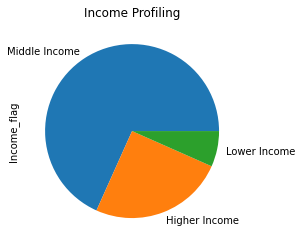

In [78]:
pie_income_flag= df_final_data['Income_flag'].value_counts().plot.pie(title = 'Income Profiling')

In [79]:
# Exporting bar plot in image format
pie_income_flag.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'pie_income_flag.png'))

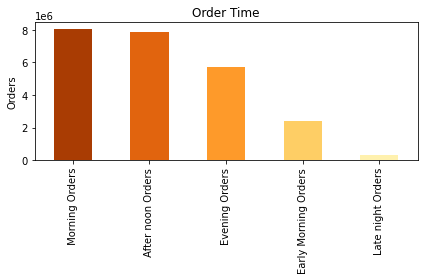

In [149]:
bar_order_time= df_final_data['Time_flag'].value_counts().plot.bar(color = sns.color_palette('YlOrBr_r', 5),ylabel= 'Orders',title= 'Order Time')
plt.tight_layout()

In [150]:
bar_order_time.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'bar_order_time.png'))

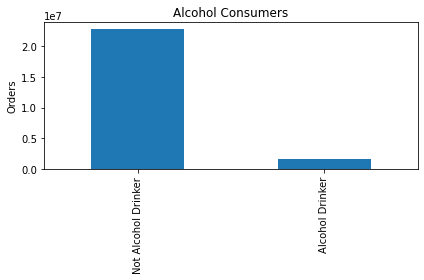

In [152]:
pie_alcohol_drinkers= df_final_data['Alcohol Drinker'].value_counts().plot.bar(ylabel='Orders',title = 'Alcohol Consumers')
plt.tight_layout()

In [153]:
pie_alcohol_drinkers.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'bar_alcohol_drinkers.png'))

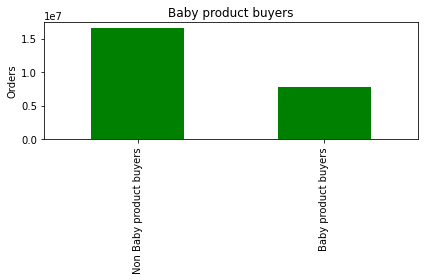

In [158]:
bar_baby_product= df_final_data['Baby product flag'].value_counts().plot.bar(color = 'green',ylabel='Orders',title= 'Baby product buyers')
plt.tight_layout()

In [159]:
bar_baby_product.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'bar_baby_product.png'))


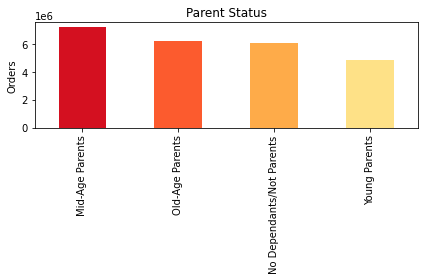

In [160]:
# Creating bar plot for parent status
bar_Parent_Status=df_final_data['Parent_Status'].value_counts().plot.bar(color=sns.color_palette('YlOrRd_r', 4),ylabel='Orders',title = 'Parent Status')
plt.tight_layout()

In [161]:
# Exporting bar plot in image format
bar_Parent_Status.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'bar_parent_status.png'))

## Aggregate the max, mean, and min variables on a customer-profile level 

### GENERATION FLAG

In [88]:
df_final_data.groupby('Parent_Status').agg({'days_since_prior_order':['max','min','mean','median']})

days_since_prior_order                       
                                             max  min       mean median
Parent_Status                                                          
Mid-Age Parents                             30.0  0.0  10.098240    7.0
No Dependants/Not Parents                   30.0  0.0  10.063556    7.0
Old-Age Parents                             30.0  0.0  10.092383    7.0
Young Parents                               30.0  0.0  10.084048    7.0

In [89]:
df_final_data.groupby('Parent_Status').agg({'prices':['max','min','mean','median']})

prices                      
                             max min       mean median
Parent_Status                                         
Mid-Age Parents            99999   1  11.254527      7
No Dependants/Not Parents  99999   1  11.588416      7
Old-Age Parents            99999   1  11.241290      7
Young Parents              99999   1  11.515967      7

In [191]:
df_final_data.groupby('Parent_Status').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                                         max min      mean median
Parent_Status                                                    
Mid-Age Parents                            6   0  2.751182      3
No Dependants/Not Parents                  6   0  2.741635      3
Old-Age Parents                            6   0  2.753424      3
Young Parents                              6   0  2.744084      3

In [194]:
df_final_data.groupby('Generation_flag').agg({'order_hour_of_day':['max','min','mean','median']})

order_hour_of_day                      
                                max min       mean median
Generation_flag                                          
Mid-Age Customers                23   0  13.374808     13
Old-Age customers                23   0  13.366549     13
Young customers                  23   0  13.338951     13

In [190]:
df_final_data.groupby('Generation_flag').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                                 max min      mean median
Generation_flag                                          
Mid-Age Customers                  6   0  2.747503      3
Old-Age customers                  6   0  2.755115      3
Young customers                    6   0  2.739426      3

In [90]:
df_final_data.groupby('Generation_flag').agg({'days_since_prior_order':['max','min','mean','median']})

days_since_prior_order                       
                                     max  min       mean median
Generation_flag                                                
Mid-Age Customers                   30.0  0.0  10.077622    7.0
Old-Age customers                   30.0  0.0  10.078928    7.0
Young customers                     30.0  0.0  10.104539    7.0

In [91]:
df_final_data.groupby('Generation_flag').agg({'prices':['max','min','mean','sum']})

prices                          
                     max min       mean        sum
Generation_flag                                   
Mid-Age Customers  99999   1  11.421518  109461981
Old-Age customers  99999   1  11.159775   92967602
Young customers    99999   1  11.626825   75579492

### Income 

In [92]:
df_final_data.groupby('Income_flag').agg({'days_since_prior_order':['max','min','mean','median']})

days_since_prior_order                       
                                 max  min       mean median
Income_flag                                                
Higher Income                   30.0  0.0  10.037286    7.0
Lower Income                    30.0  0.0  10.442884    7.0
Middle Income                   30.0  0.0  10.068129    7.0

In [93]:
df_final_data.groupby('Income_flag').agg({'orders_day_of_week':['max','min','mean','median']})

orders_day_of_week                     
                             max min      mean median
Income_flag                                          
Higher Income                  6   0  2.751367      3
Lower Income                   6   0  2.741256      3
Middle Income                  6   0  2.747344      3

In [94]:
df_final_data.groupby('Income_flag').agg({'prices':['max','min','mean','sum']})

prices                          
                 max min       mean        sum
Income_flag                                   
Higher Income  99999   1  21.213463  129911289
Lower Income      25   1   6.124697    9912296
Middle Income  99999   1   8.288248  138185490

Higher income people spends more than others

In [95]:
df_final_data.groupby('Alcohol Drinker').agg({'prices':['max','min','mean','sum']})

prices                          
                       max min       mean        sum
Alcohol Drinker                                     
Alcohol Drinker      99999   1  24.016358   39262350
Not Alcohol Drinker  99999   1  10.480513  238746725

In [96]:
df_final_data.groupby('Alcohol Drinker').agg({'days_since_prior_order':['max','min','mean','sum']})

days_since_prior_order                             
                                       max  min       mean          sum
Alcohol Drinker                                                        
Alcohol Drinker                       30.0  0.0   9.489670   15513874.0
Not Alcohol Drinker                   30.0  0.0  10.127975  230715880.0

 Alcohol drinkers shop more frequently as compared to non alcohol drinkers.

In [97]:
df_final_data.groupby('Baby product flag').agg({'days_since_prior_order':['max','min','mean','sum']})

days_since_prior_order                             
                                           max  min       mean          sum
Baby product flag                                                          
Baby product buyers                       30.0  0.0   8.671506   67812853.0
Non Baby product buyers                   30.0  0.0  10.751449  178416901.0

Baby product buyers shop more frequently as compared to non Baby product buyers.

In [98]:
df_final_data.groupby('Baby product flag').agg({'prices':['max','min','mean','sum']})

prices                          
                           max min       mean        sum
Baby product flag                                       
Baby product buyers      99999   1  10.122010   79156072
Non Baby product buyers  99999   1  11.982934  198853003

## Compare  customer profiles with regions and departments


In [99]:
# First we will create customers profiles with regions and departments
df_customer_profile = df_final_data[['user_id', 'Region', 'department_id', 'Generation_flag', 'Income_flag', 'Alcohol Drinker', 'Baby product flag']]


In [100]:
df_customer_profile.shape

(24414877, 7)

In [101]:
df_customer_profile.head()

,user_id,Region,department_id,Generation_flag,Income_flag,Alcohol Drinker,Baby product flag
0,138,Mideast,19,Old-Age customers,Middle Income,Not Alcohol Drinker,Non Baby product buyers
1,138,Mideast,19,Old-Age customers,Middle Income,Not Alcohol Drinker,Non Baby product buyers
2,138,Mideast,12,Old-Age customers,Middle Income,Not Alcohol Drinker,Non Baby product buyers
3,138,Mideast,10,Old-Age customers,Middle Income,Not Alcohol Drinker,Non Baby product buyers
4,138,Mideast,4,Old-Age customers,Middle Income,Not Alcohol Drinker,Non Baby product buyers


## Generation flag profile with department and region

In [102]:

# Generation flag by department
crosstab_generation_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Generation_flag'], dropna=False )


In [103]:
crosstab_generation_dept

Generation_flag,Mid-Age Customers,Old-Age customers,Young customers
department_id,,,
1,638365,559278,429971
2,10550,9125,7491
3,346544,301343,235443
4,2837442,2469024,1920625
5,42502,35322,30148
6,77789,66658,53453
7,799286,700382,536779
8,28015,24746,19350
9,248616,215562,169547


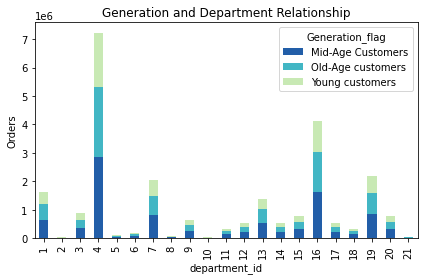

In [163]:
# Stacked bar plot for generation department
generation_dept_stacked_bar = crosstab_generation_dept.plot.bar(stacked= True, color= sns.color_palette('YlGnBu_r', 3), ylabel='Orders',title = 'Generation and Department Relationship')
plt.tight_layout()

In [164]:
# Exporting bar chart
generation_dept_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'generation_department_stacked_bar.png'))

In [106]:
# Generation flag by region
crosstab_generation_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Generation_flag'], dropna=False)

In [107]:
crosstab_generation_region

Generation_flag,Mid-Age Customers,Old-Age customers,Young customers
Region,,,
Mideast,2284770,1924052,1502934
Northeast,1662207,1489666,1163398
South,3170149,2774857,2184080
West,2466712,2142023,1650029


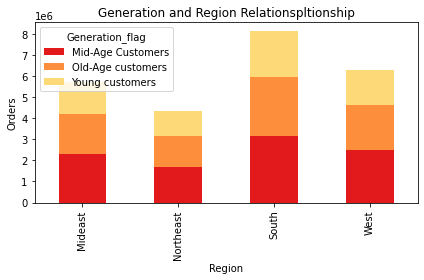

In [181]:
# Stacked bar plot for generation department
generation_region_stacked_bar = crosstab_generation_region.plot.bar(stacked= True,color=sns.color_palette('YlOrRd_r', 3),ylabel='Orders', title = 'Generation and Region Relationspltionship')
plt.tight_layout()

In [182]:
# Exporting bar chart
generation_region_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'generation_region_stacked_bar.png'))

## Income profile with department and region


In [110]:
# Income status by department
crosstab_income_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Income_flag'], dropna=False )


In [111]:
crosstab_income_dept

Income_flag,Higher Income,Lower Income,Middle Income
department_id,,,
1,418152,99903,1109559
2,6925,1918,18323
3,230059,49309,603962
4,1826609,387955,5012527
5,31353,7619,69000
6,50635,9839,137426
7,491879,194261,1350307
8,19489,4397,48225
9,164762,28127,440836


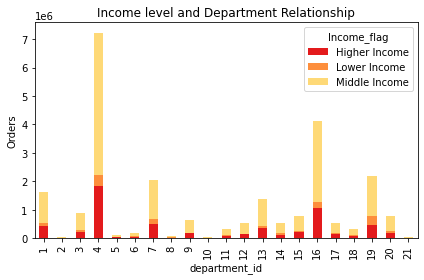

In [168]:
# Stacked bar plot for income department
income_dept_stacked_bar = crosstab_income_dept.plot.bar(stacked= True,color=sns.color_palette('YlOrRd_r', 3), ylabel='Orders',title = 'Income level and Department Relationship')
plt.tight_layout()

In [169]:
# Exporting bar chart
income_dept_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'income_department_stacked_bar.png'))

In [114]:
# Income status by region
crosstab_income_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Income_flag'], dropna=False )


In [115]:
crosstab_income_region

Income_flag,Higher Income,Lower Income,Middle Income
Region,,,
Mideast,1456024,370703,3885029
Northeast,1083488,288083,2943700
South,2018129,554057,5556900
West,1566361,405571,4286832


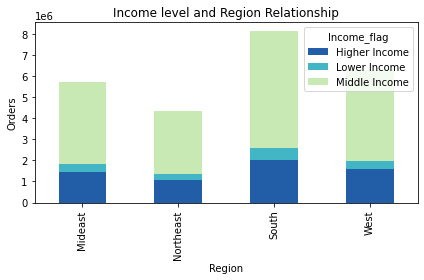

In [172]:
# Stacked bar plot for income department
income_region_stacked_bar = crosstab_income_region.plot.bar(stacked= True,color= sns.color_palette('YlGnBu_r',3),ylabel='Orders', title = 'Income level and Region Relationship')
plt.tight_layout()

In [173]:
# Exporting bar chart
income_region_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'income_region_stacked_bar.png'))

## Alcohol drinkers profile with department and region


In [118]:
# Alcohol drinkers status by department
crosstab_alcohol_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Alcohol Drinker'], dropna=False )


In [119]:
crosstab_alcohol_dept

Alcohol Drinker,Alcohol Drinker,Not Alcohol Drinker
department_id,,
1,109212,1518402
2,4618,22548
3,74727,808603
4,293108,6933983
5,107972,0
6,14550,183350
7,180859,1855588
8,12780,59331
9,43777,589948


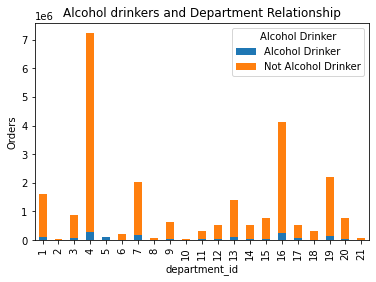

In [120]:
# Stacked bar plot for alcohol drinker department
alcohol_dept_stacked_bar = crosstab_alcohol_dept.plot.bar(stacked= True, ylabel = 'Orders',title = 'Alcohol drinkers and Department Relationship')

In [121]:
# Exporting bar chart
alcohol_dept_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'alcohol_dept_stacked_bar.png'))


In [122]:
# Alcohol drinker status by region
crosstab_alcohol_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Alcohol Drinker'], dropna=False )


In [123]:
crosstab_alcohol_region

Alcohol Drinker,Alcohol Drinker,Not Alcohol Drinker
Region,,
Mideast,377761,5333995
Northeast,273088,4042183
South,559573,7569513
West,424395,5834369


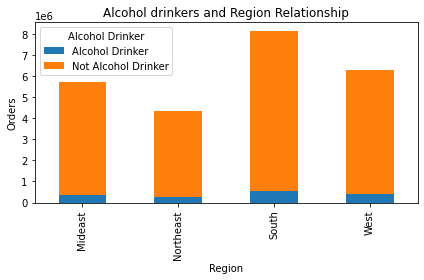

In [176]:
# Stacked bar plot for alcohol drinker region
alcohol_region_stacked_bar = crosstab_alcohol_region.plot.bar(stacked= True, ylabel = 'Orders',title = 'Alcohol drinkers and Region Relationship')
plt.tight_layout()

In [177]:
# Exporting bar chart
alcohol_region_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'alcohol_region_stacked_bar.png'))

## Baby product buyers profile with region and department

In [126]:
# Baby pdt  status by department
crosstab_baby_dept = pd.crosstab(df_customer_profile['department_id'],df_customer_profile['Baby product flag'], dropna=False )


In [127]:
crosstab_baby_dept

Baby product flag,Baby product buyers,Non Baby product buyers
department_id,,
1,530363,1097251
2,8964,18202
3,290303,593027
4,2249054,4978037
5,15903,92069
6,59661,138239
7,516211,1520236
8,18240,53871
9,229047,404678


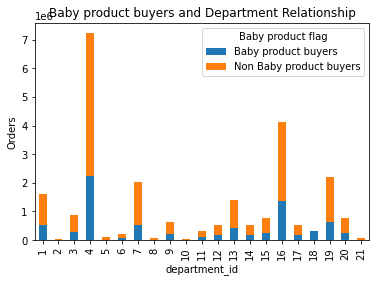

In [128]:
# Stacked bar plot for alcohol drinker department
baby_dept_stacked_bar = crosstab_baby_dept.plot.bar(stacked= True,ylabel='Orders', title = 'Baby product buyers and Department Relationship')

In [129]:
# Exporting bar chart
baby_dept_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'baby_dept_stacked_bar.png'))


In [130]:
# Baby pdt  status by region
crosstab_baby_region = pd.crosstab(df_customer_profile['Region'],df_customer_profile['Baby product flag'], dropna=False )


In [131]:
crosstab_baby_region

Baby product flag,Baby product buyers,Non Baby product buyers
Region,,
Mideast,1833870,3877886
Northeast,1399291,2915980
South,2609885,5519201
West,1977147,4281617


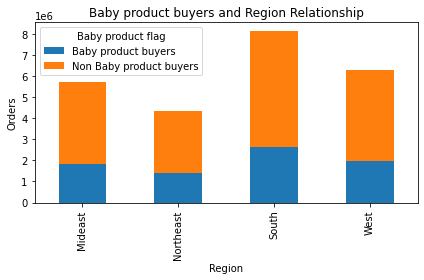

In [174]:
# Stacked bar plot for baby product region
baby_region_stacked_bar = crosstab_baby_region.plot.bar(stacked= True,ylabel='Orders', title = 'Baby product buyers and Region Relationship')
plt.tight_layout()

In [175]:
# Exporting bar chart
baby_region_stacked_bar.figure.savefig(os.path.join(path, 'chapter4','Visualization', 'baby_region_stacked_bar.png'))


In [186]:
crosstab_generation_order_habit = pd.crosstab(df_final_data['Generation_flag'],df_final_data['order_hour_of_day'], dropna=False)

In [187]:
crosstab_generation_order_habit

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Generation_flag,,,,,,,,,,,,,,,,,,,,,
Mid-Age Customers,63894,33248,18609,13963,14460,26149,87519,272332,530716,749656,...,791362,779578,733443,605881,472580,357968,285130,238694,188841,120670
Old-Age customers,52745,27484,17055,13099,14282,23766,77738,243948,463559,649081,...,688798,674385,643446,524354,408756,318231,247027,205372,161740,101890
Young customers,43894,22620,14361,10231,10918,18041,62724,188527,355565,510278,...,538094,534094,503114,403596,311354,243043,192823,157312,126439,77721
